# This workflow shows the preprocessing of data for DAY 2

It includes:
1. Preprocessing the data
2. Fitting a simple linear regression model to the training set
3. Predicting the result
4. Visualisation

The aim is to predict the percentage of marks a student is supposed to get based on hours studied.

## 1. Preprocessing the data

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# retrieve data
path = '/Users/Claudia/Documents/Personal Projects/Machine Learning/100-Days-Of-ML-Code/datasets/studentscores.csv'
df = pd.read_csv(path)

# split the data set into variables. Hours as indepentant, scores as dependant
X = df.iloc[:,:1].values
Y = df.iloc[:,1:].values

# The shape of each output depends on what you want to do with the data. 
# Independant variable must be a 2D array, and dependant can be 1D or 2D array depending on usecase.
# Simple models can use 1D depenant variables, but more complex models require 2D arrays.

In [20]:
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [21]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [22]:
# Other ways to isolate columns and make specific variables:

#X = df['Hours'].values # 1D array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, ... 7.8]) 
#X = df[['Hours']].values # 2D array array([[2.5], [5.1], [3.2], [8.5]...[7.8]])
#X = df['Hours'] # 'float64' 0     2.5   1     5.1   2     3.2
#X = df[['Hours']] # dataframe 	Hours | 0	2.5 | 1 	5.1 |  2	3.2


In [23]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [24]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [25]:
# check data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [26]:
# check for nulls
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Split the Data into train and test

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.25, random_state = 12) # random_state is integer seed value that controls the randomness

In [28]:
X_test

array([[7.4],
       [5.5],
       [6.1],
       [5.1],
       [8.9],
       [8.3],
       [3.5]])

In [29]:
X_train

array([[1.1],
       [3.8],
       [2.5],
       [7.7],
       [6.9],
       [7.8],
       [4.8],
       [2.7],
       [3.3],
       [1.5],
       [2.5],
       [4.5],
       [2.7],
       [8.5],
       [3.2],
       [1.9],
       [9.2],
       [5.9]])

## 2. Fitting a simple linear regression model to the training set


Trains (or fits) the linear regression model using the training dataset (X_train for features and Y_train for the target variable).

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train) # fit it to training data

## 3. Predicting the result

The following will predict Y values from the given test_X values. The next step would be to evaluate how accurate these predictions are compared to the Y_test. This is potentially done using R^2 but I can't find that anywhere in the instructions.

In [31]:
Y_pred = regressor.predict(X_test)
print(Y_pred) 

[[74.85728685]
 [56.49069842]
 [62.29067372]
 [52.62404822]
 [89.35722509]
 [83.5572498 ]
 [37.15744744]]


## 4. Visualisation

Using a scatter plot, from mattplotlib, plot the training results, followed by the test results.

X_train is the independant variables I trained the model on (hours studied) and that is plotted on the x axis.
Y_train is the depenant variable I trained the model on (scores) and that is plotted on the y axis.
regressor is the model I trained.

Text(0.5, 1.0, 'Training Data Scatter Plot')

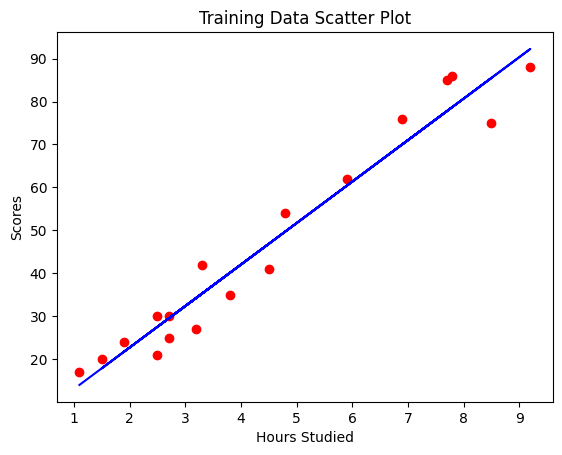

In [32]:
plt.scatter(X_train , Y_train, color = 'red') # plots the data points in red
plt.plot(X_train , regressor.predict(X_train), color ='blue') # draws the model's predicted line based on the data in the training set
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.title('Training Data Scatter Plot')

Then the test data:
This plot is crucial for evaluating the model's performance on new, unseen data. It shows how well the model generalizes beyond the training data.
You can compare the red dots (actual values from the test set) with the blue line (predictions made by the model based on the test data). This helps assess whether the model can make accurate predictions on data it hasn’t been trained on.

The actual data of the test set is plotted in red, and the blue line shows the predicted y values based on the dependant variables of X_test. 

The model adapts well to the unseen data since the line is fitted well to the red dots.

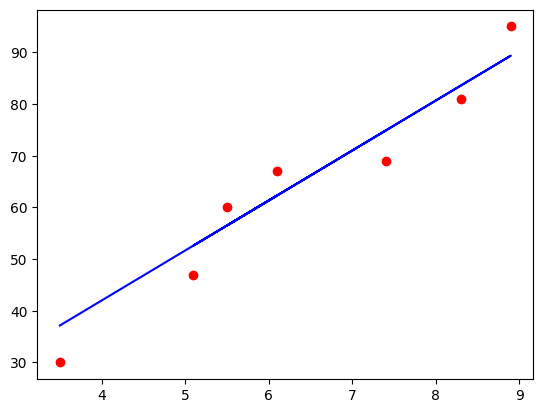

In [33]:
plt.scatter(X_test , Y_test, color = 'red')
plt.plot(X_test , regressor.predict(X_test), color ='blue')